## 1. Imports

In [22]:
import numpy as np
from numpy import linalg as LA
import pandas as pd

# for data
import keras

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## 1.1 Getting the MNIST data

In [2]:
# getting the MNIST data from keras
(x_train, y_train), _ = keras.datasets.mnist.load_data(path="mnist.npz")

In [3]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
# shape of the input data
x_train.shape

(60000, 28, 28)

## 1.2 Reshaping the data

In [5]:
# reshaping the data
x_train = x_train.reshape(60000,784)

## 2.0  Column Standarization of the MNIST data

In [6]:
# getting the means and stddevs of all the columns
def get_means_and_stddev(data):
    column_means, column_stddev = [], []
    rows, cols = data.shape
    for index in range(0, cols):
        mean, stddev = data[:, index].mean(), data[:, index].std() 
        column_means.append(mean)
        column_stddev.append(stddev)
    return np.array(column_means), np.array(column_stddev)

# column standarizer
def columns_standarizer(data):
    rows, cols = data.shape
    means, stddevs = get_means_and_stddev(data = data)
    stddevs[ stddevs == 0.0] = pow(10, -6)
    preprocessed = []
    for row in range(0, rows):
        datapoint = data[row, :]
        standarized = (datapoint - means) / stddevs
        preprocessed.append(standarized)
    return np.array(preprocessed)

In [7]:
# performing column standarisation
X = columns_standarizer(data = x_train)

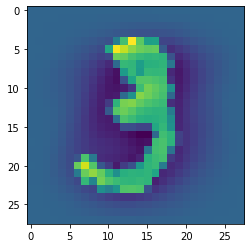

In [8]:
# plotting the standarized data
plt.imshow(X[10, :].reshape(28, 28));

## 2.1 Getting the Eigenvalues, Eigenvectors and Covariance Matrix

In [9]:
# getting the covarinace matrix
def get_covar(standarized_data):
    return np.cov(standarized_data.T)

# getting the eigen values and eigen vectors
def gen_eigens(covariance_matrix):
    eigenvals, eigenvects = LA.eig(covariance_matrix)
    eigenvects = eigenvects.T
    
    return eigenvals, eigenvects

## 2.2 Principle Component Analysis

In [14]:
def PCA(n_component = 2, data = x_train, plot = True):
    # performing column standarisation
    X_standarized = columns_standarizer(data = data)
    # getting the covarinace matrix 
    covar_matrix = get_covar(standarized_data = X_standarized)
    # getting the eigen_values and eigen_vectors
    eigenvalues, eigenvectors = gen_eigens(covariance_matrix = covar_matrix)      
    
    projection = []
    
    for comp in range(0, n_component):
        projected = X_standarized.dot(eigenvectors[comp])
        projection.append(projected)
        
    projection = np.array(projection).T
    data_points = {}
    for i in range(0 , projection.shape[1]):
        data_points[f"f{i + 1}"] = projection[: , i]

    df = pd.DataFrame(data = data_points)
    
    # this function returns the dataframe where each columns are projected features
    return df

## 3.0 Applying PCA on MNIST data

In [25]:
# transforming the 784 dimensional data into 2 dimensions
components = 2
df = PCA(n_component = components, data = x_train)

# adding the outputs
df["class"] = y_train

# the shapes
print(df.shape)

(60000, 3)


In [31]:
df.head(5)

f1        f2  class
0  0.922159 -4.814790      5
1 -8.708977 -7.754403      0
2 -2.328389  9.431338      4
3  6.582173 -3.746318      1
4  5.183251  3.133297      9

## 3.1 Visualisation of MNIST data in 2 dimensions

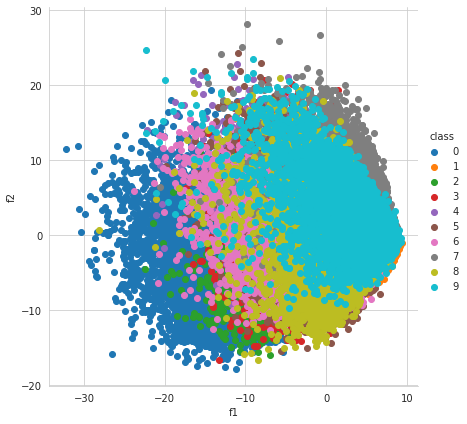

In [35]:
sns.set_style("whitegrid")
sns.FacetGrid(df,
             hue= "class",
             height=6).map(plt.scatter, "f1", "f2").add_legend()
plt.show()

## 3.1  Visualisation of MNIST data in 3 dimensional space

In [33]:
# transforming the 784 dimensional data into 3 dimensions
components = 3
df = PCA(n_component = components, data = x_train)

# adding the outputs
df["class"] = y_train

# the shapes
print(df.shape)

(60000, 4)


In [34]:
# 3 dimensional visualisaion of the MNIST data
fig = px.scatter_3d(df,
                    x='f1',
                    y='f2',
                    z='f3',
                    color='class',
                    opacity=0.9)
fig.update_traces(marker=dict(size=2),
                  selector=dict(mode='markers'))
fig.show()